In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import tensorflow_datasets as tfds

In [28]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [29]:
train_dataset, test_dataset = dataset['train'],dataset['test']

In [30]:
class_names = metadata.features['label'].names
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [31]:
#number of data items
train_count = metadata.splits['train'].num_examples
test_count = metadata.splits['test'].num_examples
print('Test:',test_count)
print('Train:',train_count)

Test: 10000
Train: 60000


In [32]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [33]:
#normalize the data in the range [0,1] because the pixel range is 0-255
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [34]:
print(train_dataset)

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


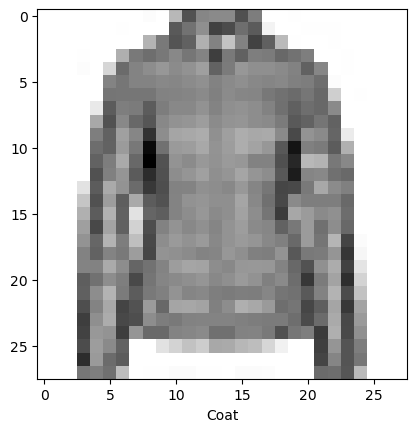

In [35]:
# Sample Image
for image,label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.xlabel(class_names[label])
plt.show()

In [36]:
# model = tf.keras.Sequential([
# tf.keras.layers.Flatten(input_shape=(28,28,1)),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(10,activation='softmax')
# ])
#USing CNN layers
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
#train the model
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(train_count).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [39]:
# import math
model.fit(train_dataset,epochs=10, steps_per_epoch = math.ceil(train_count/batch_size))

Epoch 1/10
1875/1875 [==============================] - 48s 20ms/step - loss: 0.3964 - accuracy: 0.8565
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2540 - accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2132 - accuracy: 0.9217
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1785 - accuracy: 0.9354
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1509 - accuracy: 0.9439
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1309 - accuracy: 0.9517
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1089 - accuracy: 0.9592
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0913 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0761 - accuracy: 0.9719
Epoch 10/10
1875/1875 [==============================] - 47s 25m

In [40]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(test_count/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 7s 21ms/step - loss: 0.3143 - accuracy: 0.9196
Accuracy on test dataset: 0.9196000099182129


In [41]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 170ms/step


In [42]:
predictions.shape

(32, 10)

In [43]:
predictions[0]

array([8.5697643e-11, 9.6220046e-11, 1.6905410e-03, 6.8739653e-11,
       9.9793553e-01, 1.2285670e-10, 3.7366446e-04, 1.2333683e-10,
       6.5033035e-10, 2.6343935e-07], dtype=float32)

In [44]:
np.argmax(predictions[0])

4